### 이미지 분류

#### CNN
- Convolutional Neural Network - 합성곱 신경망

<!-- 깃허브에선 표시x
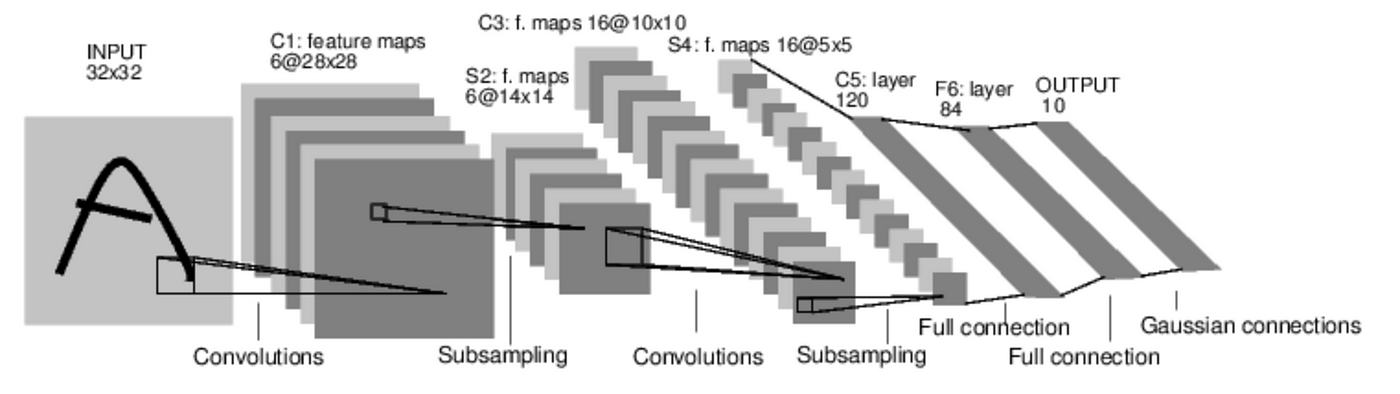 -->

In [2]:
!pip install matplotlib

     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     ---------------------------- --------- 122.9/165.9 kB 3.5 MB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.4/8.0 MB 7.8 MB/s eta 0:00:01
   ---- ----------------------------------- 0.8/8.0 MB 8.6 MB/s eta 0:00:01
   ------ --------------------------------- 1.3/8.0 MB 8.9 MB/s eta 0:00:01
   -------- ------------------------------- 1.8/8.0 MB 9.5 MB/s eta 0:00:01
   ----------- ---------------------------- 2.3/8.0 MB 9.9 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/8.0 MB 10.2 MB/s eta 0:00:01
   ----------------- ---------------------- 3.4/8.0 MB 10.5 MB/s eta 0:00:01
   ------------------- -------------------- 4.0/8.0 MB 10.6 MB/s eta 0:00:01
   ---------------------- ----------------- 4.5/8.0 MB 10.7 MB/s eta 0:00:01
   -------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import time
import os
import copy

import numpy as np

import matplotlib.pyplot as plt

## 파이토치
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader

In [7]:
## CPU/GPU 확인
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

torch.__version__, device

('2.4.0+cu121', device(type='cuda'))

In [9]:
## CNN에서 제일 유명한 MNIST(미국 국립 표준기술연구소)에서 제공하는 이미지 데이터베이스
train_ds = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_ds = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [10]:
## 파이토치 훈련, 테스트할 때 쉽게 쓸 수 있도록 데이터로더로 변환
train_ldr = DataLoader(dataset=train_ds, batch_size=32, shuffle=True)
test_ldr = DataLoader(dataset=test_ds, batch_size=32, shuffle=False) ## Test(실험) 데이터는 섞을 필요x

In [13]:
len(train_ldr), len(test_ldr) # 8:2에 가까움 85:15

(1875, 313)

In [18]:
## 데이터확인
for(X_train, y_train) in train_ldr:
    print(f'X_trian : {X_train.size()}, type: {X_train.type()} / y_train : {y_train.size()}, type: {y_train.type()}')
    break

X_trian : torch.Size([32, 1, 28, 28]), type: torch.FloatTensor / y_train : torch.Size([32]), type: torch.LongTensor


In [ ]:
##